<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Роман Абрамов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Желтые замечания и рекомендации необязательны к исправлению - на то это и рекомендации. Они больше ориентированы на улучшение твоих навыков
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
!pip install catboost

You should consider upgrading via the 'C:\Prog\kwork\CorrDS\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install lightgbm

You should consider upgrading via the 'C:\Prog\kwork\CorrDS\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Блок импорта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Простые модели, на которых будем проверять
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

# Возможный бонус
from sklearn.linear_model import Ridge

# Вспомогательные методы
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import  make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

# буст
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Плюс за структуризацию импортов

In [4]:
# Загрузим наши данные
df = pd.read_csv('datasets/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Не все параметры будут нужны для определения стоимости автомобиля. Например, дата выгрузки анкеты или создания объявления. Наличие фотографий может влиять на скорость продажи машины, но не на ее рыночную стоимость. Удалим их. 

In [5]:
del df['DateCrawled'], df['DateCreated'], df['NumberOfPictures'], df['PostalCode'], df['LastSeen']
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что объясняешь. Но из них можно было бы выделить дополнительные признаки - страна объявления, или, например, определить верхнее время года по дате сбора.

In [6]:
# Посмотрим инфо по интересующим нас данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        316879 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            334536 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              334664 non-null  object
 6   Kilometer          354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           321474 non-null  object
 9   Brand              354369 non-null  object
 10  NotRepaired        283215 non-null  object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


<b>Видим, что</b>
    <ul>
<li>С типами в целом, всё в порядке</li>
<li>Есть много пропущенный значений</li>
<li>Есть явные выбросы в обе стороны у лошадинных сил и года регистрации </li>
<li>Нулевой месяц регистрации вызывает вопросы</li>
</ul>
Начнем с обработки выбросов.

In [7]:
df['RegistrationMonth'].value_counts()

0     37352
3     34373
6     31508
4     29270
5     29153
7     27213
10    26099
12    24289
11    24186
9     23813
1     23219
8     22627
2     21267
Name: RegistrationMonth, dtype: int64

У нас 37000+ нулевых значений, просто так удалять мы их пока не будем, будем считать 0 отсутствием данных о месяце.

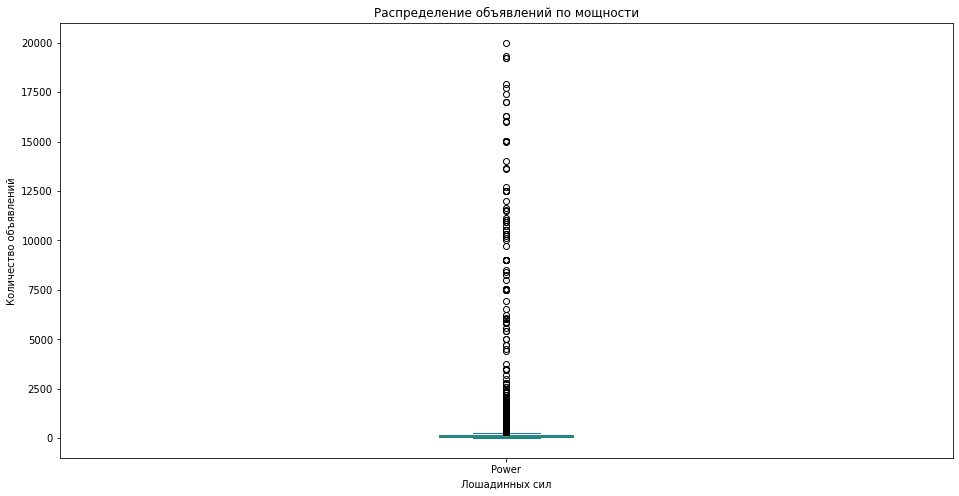

In [8]:
fig, ax = plt.subplots(1)
ax.set_title('Распределение объявлений по мощности')
ax.set_xlabel('Лошадинных сил')
ax.set_ylabel('Количество объявлений')
_, bp = df['Power'].plot(kind='box', figsize=(16,8), ax=ax, return_type='both')

In [9]:
# С помощью гугления было выяснено, что самая большая мощность серийного автомобиля - 2000 лошадинных сил
# тем не менее, посмотрим, какие у нас тут представлены данные

df[df['Power'] > 2000].head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
7661,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,NaN
11039,0,sedan,1998,manual,10317,other,150000,8,petrol,fiat,no
19092,9750,wagon,2005,auto,2729,5er,150000,7,gasoline,bmw,no
25232,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,no
33952,3740,small,2006,manual,6920,aygo,90000,10,NaN,toyota,no
36206,5400,NaN,2017,manual,2017,transporter,150000,8,gasoline,volkswagen,NaN
44520,2500,convertible,1998,manual,7512,golf,150000,6,NaN,volkswagen,NaN
45053,15800,convertible,2014,auto,10218,fortwo,30000,3,petrol,smart,NaN
45216,1690,sedan,1999,manual,7544,golf,125000,12,petrol,volkswagen,NaN
53158,1200,small,2001,manual,5411,seicento,150000,2,NaN,fiat,no


Изучив несколько из представленных машин, стало понятно, что мощность можно исправить только у fiat seicento (выглядит так, что умножили на 100). Где-то в мощности продублирован год, но в остальном выглядит так, что это какие-то случайные значения, поэтому тут мы ничего исправить не можем ориентируясь на них, но можем ориентируясь на остальные данные.

Для начала посмотрим наши границы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, плюс, что пишешь выводы явно и обосновываешь решения

In [10]:
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
whiskers[1][1]

254.0

In [11]:
# возьмем за отсечку кайен с его 340 л.с.
df[df['Power'] > 340]['Brand'].count()

1534

In [12]:
# Рассмотрим минимальные значения
df[df['Power'] < whiskers[0][0]]['Power'].value_counts()

0     40225
60    15897
54     5745
50     4627
58     3854
      ...  
21        6
22        5
9         5
32        5
28        5
Name: Power, Length: 69, dtype: int64

В данном случае 40к+ нулевых значений дают о себе знать. Судя по всему это 40000 неуказанных мощностей. Однако, мощность зачастую зависит от модели и года выпуска, а значит мы можем попробовать заполнить эти данные по уже имеющимся. И если где-то это не получится, рассмотрим вариант удаления этих значений

In [13]:
%%time

def calculate_power(df, brand, model, year):
    df_part = df[(df['RegistrationYear'] == year) & (df['Brand'] == brand) & (df['Model'] == model)]
    if (df_part['Power'].count() == 0):
        # если не нашли по году, бренду и модели, пробуем только по бренду + модели
        df_part = df[(df['Brand'] == brand) & (df['Model'] == model)]
    
    median_power = df_part['Power'].median()
    
    if (math.isnan(median_power)):
        median_power = 0
        
    return median_power

# Попробуем заполнить мощность для наших плохих данных
bad_power_df = df[(df['Power'] < 30) | (df['Power'] > 340)][['Brand', 'Model', 'RegistrationYear']]
bad_power_df.count()

CPU times: total: 15.6 ms
Wall time: 17 ms


Brand               42667
Model               35893
RegistrationYear    42667
dtype: int64

In [14]:
# Заполним незаполненные модели категорией other
bad_power_df['Model'] = bad_power_df['Model'].fillna('other')

In [15]:
bad_power_df = bad_power_df.drop_duplicates()
bad_power_df.count()

Brand               4758
Model               4758
RegistrationYear    4758
dtype: int64

In [16]:
bad_power_df

,Brand,Model,RegistrationYear
0,volkswagen,golf,1993
15,ford,ka,1910
32,volkswagen,golf,1994
37,renault,kangoo,2016
40,opel,corsa,1990
...,...,...,...
351714,jaguar,s_type,2004
353042,volkswagen,golf,1970
353267,citroen,c3,2012
354056,kia,picanto,2016


In [17]:
for row in bad_power_df.itertuples(index=True, name='Pandas'):
    year = getattr(row, "RegistrationYear")
    brand = getattr(row, "Brand")
    model = getattr(row, "Model")
    median = calculate_power(df, brand, model, year)
    searchRow = ((df['Power'] < 30) | (df['Power'] > 340)) & (df['Brand'] == brand) & (df['Model'] == model) & (df['RegistrationYear'] == year)
    df.loc[searchRow, 'Power'] = median

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Удобнее использовать следующую конструкцию, чтобы пройтись по всем строкам фрейма:
        
        for i, row in df.iterrows(): # i - index, row - строка
            ...
        
Хотя ещё проще было бы использование groupby:
        
        df.groupby([столбцы]).transform('median') # transform используем, чтобы преобразовать к первоначальному размеру фрейма

In [18]:
# Посмотрим, сколько нулевых значений осталось
df[df['Power'] == 0]['Price'].count()

7755

In [19]:
# Остались только какие-то уникальные модели, которые не встретились в остальной выборке, удалим их
df = df[df['Power'] != 0]

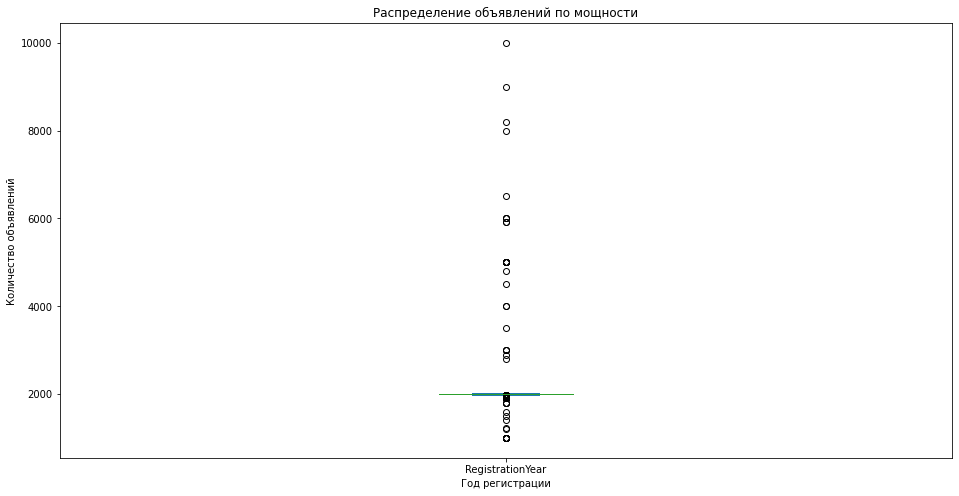

In [20]:
# Разберемся с годами
fig, ax = plt.subplots(1)
ax.set_title('Распределение объявлений по мощности')
ax.set_xlabel('Год регистрации')
ax.set_ylabel('Количество объявлений')
_, bp = df['RegistrationYear'].plot(kind='box', figsize=(16,8), ax=ax, return_type='both')

In [21]:
# Выберем только значения в диапазоне от 2020 года (остальные вряд ли возможны) 
# и от 1980 (меньше также вряд ли возможны и нам интересны)

df[(df['RegistrationYear'] < 1980) | (df['RegistrationYear'] > 2020)]['Price'].count()

2726

In [22]:
# Поскольку восстановить эти данные проблема, удалим их
df = df[(df['RegistrationYear'] >= 1980) | (df['RegistrationYear'] <= 2020)]

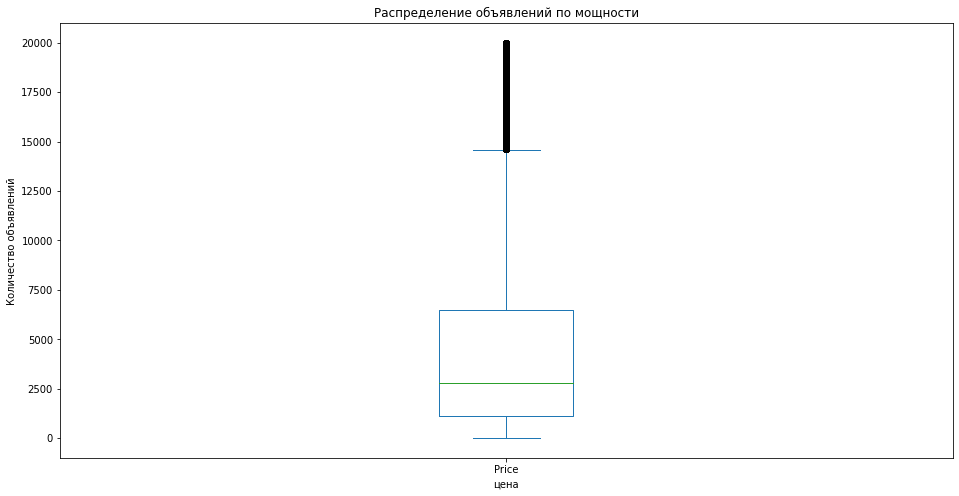

In [23]:
# Посмотрим на boxplot
fig, ax = plt.subplots(1)
ax.set_title('Распределение объявлений по мощности')
ax.set_xlabel('цена')
ax.set_ylabel('Количество объявлений')
_, bp = df['Price'].plot(kind='box', figsize=(16,8), ax=ax, return_type='both')

In [24]:
# Посмотрим, что у нас с ценой (есть нулевые значения)
df[df['Price'] < 10]['Price'].value_counts()

0    9317
1     988
5      23
2       9
9       6
3       5
7       2
8       1
Name: Price, dtype: int64

In [25]:
# По верхней границе находятся в основном audi, bmw и т.д.
# Есть исключения, но выделять их отдельно проблематично, оставим как есть
# А вот нулевые цены представляют реальную проблему, обработаем их по аналогии с мощностью двигателя,
# Но возьмем на этот раз не медиану, а среднее

def calculate_price(df, brand, model, year):
    # в среднем не будем рассчитывать нулевые значения
    df_part = df[(df['Price'] >= 10) & (df['RegistrationYear'] == year) & (df['Brand'] == brand) & (df['Model'] == model)]
    if (df_part['Price'].count() == 0):
        # если не нашли по году, бренду и модели, пробуем только по бренду + модели
        df_part = df[(df['Price'] >= 10) & (df['Brand'] == brand) & (df['Model'] == model)]
    
    mean_price = df_part['Price'].mean()
    
    if (math.isnan(mean_price)):
        mean_price = 0
        
    return mean_price

# Попробуем заполнить мощность для наших плохих данных
bad_price_df = df[df['Price'] < 10][['Brand', 'Model', 'RegistrationYear']]
bad_price_df['Model'] = bad_price_df['Model'].fillna('other')
bad_price_df = bad_price_df.drop_duplicates()
bad_price_df.count()

Brand               2379
Model               2379
RegistrationYear    2379
dtype: int64

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Восстанавливать целевую переменную не стоит - у тебя тогда получится смещенная модель. Эти столбцы можно было бы отбросить - они представляют не так много данных.

In [26]:
%%time

for row in bad_price_df.itertuples(index=True, name='Pandas'):
    year = getattr(row, "RegistrationYear")
    brand = getattr(row, "Brand")
    model = getattr(row, "Model")
    mean_price = calculate_price(df, brand, model, year)
    searchRow = (df['Price'] < 15) & (df['Brand'] == brand) & (df['Model'] == model) & (df['RegistrationYear'] == year)
    df.loc[searchRow, 'Price'] = mean_price
    
df[df['Price'] < 10]['Price'].count()

CPU times: total: 2min 17s
Wall time: 2min 17s


1003

In [27]:
# Осталось совсем немного кривых данных, удалим их
df = df[df['Price'] >= 10]

<b>Промежуточный вывод</b>
<ul>
<li>Мы дозаполнили данные о мощности автомобиля для отсутствующих значений и выбросов</li>
<li>Где не получилось этого сделать, мы удалили данные с незаполненным годом регистрации и мощностью автомобиля, т.к. это факторы, которые в любом случае будут влиять на цену</li>
<li>Мы заполнили отсутствующие значения для цены, не затрагивая верхнюю границу</li>
</ul>
Километраж выглядит похожим на правду, а месяц мы вряд ли сможем как-то спрогнозировать, поэтому оставляем, как есть.

В остальном, нам необходимо заполнить пропуски в категориальных признаках.

Важный момент, дубликаты обрабатывать не будем, т.к. в случае продажи машин могут продаваться с разным цветом и объявления просто похожи друг на друга.

In [28]:
# Посмотрим, как обстоят дела с пропуске в обработанном DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345611 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              345611 non-null  float64
 1   VehicleType        313073 non-null  object 
 2   RegistrationYear   345611 non-null  int64  
 3   Gearbox            329835 non-null  object 
 4   Power              345611 non-null  float64
 5   Model              333203 non-null  object 
 6   Kilometer          345611 non-null  int64  
 7   RegistrationMonth  345611 non-null  int64  
 8   FuelType           317205 non-null  object 
 9   Brand              345611 non-null  object 
 10  NotRepaired        280176 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.6+ MB


In [29]:
# Посмотрим, есть ли артифакты в значениях NotRepaired
df['NotRepaired'].value_counts()

no     245045
yes     35131
Name: NotRepaired, dtype: int64

In [30]:
# По сути, мы имеем третью категорию, когда нам неизвестно была ли машина в ремонте. Выгоднее это указывать,
# если ремонт все же был, однако нам неизвестен источник данных и, возможно, мы просто не смогли подтянуть соответствующую
# информацию, поэтому в данном случае будет правильно переделать признак в числовой для удобства, где
# 0 будет отсутствие ремонта, 1 неизвестно и 2 - ремонт был (таким образом определим вес каждой категории)

df['NotRepaired'] = df['NotRepaired'].fillna(1)

def fill_not_repaired(value):
    if value == 'no':
        return 0
    elif value == 'yes':
        return 2
    else:
        return value

df['NotRepaired'] = df['NotRepaired'].apply(fill_not_repaired)
df['NotRepaired'].value_counts()

0    245045
1     65435
2     35131
Name: NotRepaired, dtype: int64

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Хорошо, что объясняешь все, но советовал бы делать это в markdown ячейке - так проще читать. Плюс, для соблюдения структуры, неплохо было бы кодировку и все остальное перенести уже после раздела с обработкой данных.

In [31]:
# Разберемся с VehicleType
df['VehicleType'].value_counts()

sedan          90483
small          78828
wagon          64565
bus            28469
convertible    19974
coupe          15914
suv            11798
other           3042
Name: VehicleType, dtype: int64

In [32]:
# Тут на самом деле отсутствие значения можно выделить в отдельную категорию
df['VehicleType'] = df['VehicleType'].fillna('undefined')

In [33]:
# Аналогичным образом поступим и для остальных признаков
# т.к. их восстановление или проблематично или не имеет решающей роли, в т.ч. т.к. их осталось меньше 10%
df['Gearbox'] = df['Gearbox'].fillna('undefined')
df['Model'] = df['Model'].fillna('undefined')
df['FuelType'] = df['FuelType'].fillna('undefined')
df['Brand'] = df['Brand'].fillna('undefined')

# сразу сбросим индексы
df = df.reset_index()

# посмотрим, что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345611 entries, 0 to 345610
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              345611 non-null  int64  
 1   Price              345611 non-null  float64
 2   VehicleType        345611 non-null  object 
 3   RegistrationYear   345611 non-null  int64  
 4   Gearbox            345611 non-null  object 
 5   Power              345611 non-null  float64
 6   Model              345611 non-null  object 
 7   Kilometer          345611 non-null  int64  
 8   RegistrationMonth  345611 non-null  int64  
 9   FuelType           345611 non-null  object 
 10  Brand              345611 non-null  object 
 11  NotRepaired        345611 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 31.6+ MB


In [34]:
# Удалим уже не нужные DF
del bad_price_df, bad_power_df

<b>Вывод</b>

Мы подготовили данные, попытавшись спасти максимум возможного. Обработали аномальные значения, рассмотрели каждый признак и исключили признаки, не имеющие для нас значения.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>


Как можно улучшить:  воспользоваться инструментами для работой с аномалиями, например удалить данные, которые не вмещаются в 1.5 iqr или отбросить по перцентилям. Тут неплохой гайд есть по этому (но перед удалением необходимо все равно сделать проверку - адекватно ли удалять эти значения)
    
Общий гайд по работе с выбросами
    
https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6
    
Объяснение 1.5 iqr
    
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097
    
Использование groupby для заполнения
    
https://medium.com/analytics-vidhya/best-way-to-impute-categorical-data-using-groupby-mean-mode-2dc5f5d4e12d
    
https://www.kaggle.com/code/pankeshpatel/handing-missing-data-group-based-imputation/notebook

## Обучение моделей

Поступим следующим образом:

1. Сперва отскалируем признаки и подготовим их для обучения  для простых моделей
2. Разобьем выборку на тестовую и валидационную
3. Обучим наши модели на простых моделях (линейная регрессия и случайный лес)
4. Попробуем LGBMRegressor и CatBoostRegressor

In [35]:
# Определим random_state
RANDOM_STATE=12345

In [36]:
# выделим категориальные признаки
# не забудем, что хоть речь и о числовом представлении, на самом деле месяц регистрации - это категория
# однако т.к. выше мы обработали признак NotRepaired и фактически задали состояниям веса, его сюда не добавляем
category_features = ['VehicleType', 'Gearbox', 'Brand', 'Model', 'FuelType', 'RegistrationMonth']

# Также определим числовые признаки
number_features = ['RegistrationYear', 'Power', 'Kilometer', 'NotRepaired']

# Оставим в DF только то, что нужно (с обработкой категориальных признаков)
df = df[number_features + category_features + ['Price']];
df_simple = df.copy()
df_simple.head()

,RegistrationYear,Power,Kilometer,NotRepaired,VehicleType,Gearbox,Brand,Model,FuelType,RegistrationMonth,Price
0,1993,75.0,150000,1,undefined,manual,volkswagen,golf,petrol,0,480.0
1,2011,190.0,125000,2,coupe,manual,audi,undefined,gasoline,5,18300.0
2,2004,163.0,125000,1,suv,auto,jeep,grand,gasoline,8,9800.0
3,2001,75.0,150000,0,small,manual,volkswagen,golf,petrol,6,1500.0
4,2008,69.0,90000,0,small,manual,skoda,fabia,gasoline,7,3600.0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что выделяешь категориальные и числовые признаки в переменные

In [37]:
# Разделим признаки
features = df_simple.drop(columns='Price')
target = df_simple['Price']

# Подготовим наши категориальные признаки, будем использовать технику OHE, как более универсальную
#features_ohe = pd.get_dummies(features, columns=category_features, drop_first=True)
features.head()

,RegistrationYear,Power,Kilometer,NotRepaired,VehicleType,Gearbox,Brand,Model,FuelType,RegistrationMonth
0,1993,75.0,150000,1,undefined,manual,volkswagen,golf,petrol,0
1,2011,190.0,125000,2,coupe,manual,audi,undefined,gasoline,5
2,2004,163.0,125000,1,suv,auto,jeep,grand,gasoline,8
3,2001,75.0,150000,0,small,manual,volkswagen,golf,petrol,6
4,2008,69.0,90000,0,small,manual,skoda,fabia,gasoline,7


In [38]:
# Проведем скалирование числовых признаков
#scaler = StandardScaler()

#scaler.fit(features_ohe[number_features])
#features_ohe_scaled = features_ohe.copy()
#features_ohe_scaled[number_features] = scaler.transform(features_ohe_scaled[number_features])
#features_ohe_scaled.head()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>

Скейлеру нельзя показывать тестовую и валидационную выборку при fit - это делает метрики менее объективными.

<div class="alert alert-success">

<h2> Комментарий ревьюера 2 итерация <a class="tocSkip"> </h2>

Плюс

<br>
Исправлено
</br>

In [39]:
# Поделим нашу выборку в пропорции 75-25, т.к. параметры мы будем искать с помощью кросс-валидации через GridSearchCV
# Соответственно, валидационная выборка в контексте задачи нам не пригодится
# Вторая функция оставлена на всякий случай, т.к. изначально делал 3 выборки в рамках работы 
# (предполагал, что мы будем перепроверять итоговую модель на тесте, но решил, что это избыточно в рамках нашей задачи)

def create_train_valid_and_test_set(features, target):
    features_train, df_valid_ant_test_features, target_train, df_valid_ant_test_target = train_test_split(
        features, target, test_size=0.4, random_state=RANDOM_STATE)

    # теперь разделим тестовую выборку от валидационной
    features_valid, features_test, target_valid, target_test = train_test_split(
        df_valid_ant_test_features, df_valid_ant_test_target, test_size=0.5, random_state=RANDOM_STATE)

    del df_valid_ant_test_features, df_valid_ant_test_target
    
    # Проверим, что получилось
    print('Target test count = {}, Valid count = {}, Train test count = {}'.format(target_test.count(), target_valid.count(), target_train.count()))
    
    return features_train, target_train, features_valid, target_valid, features_test, target_test

def create_train_and_test_set(features, target):
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=RANDOM_STATE)
    
    # Проверим, что получилось
    print('Target test count = {}, Train test count = {}'.format(target_test.count(), target_train.count()))
    
    return features_train, target_train, features_test, target_test

features_train, target_train, features_val, target_val, features_test, target_test = create_train_valid_and_test_set(features, target)

Target test count = 69123, Valid count = 69122, Train test count = 207366


In [40]:
# Определим функцию для подсчета RMSE
def rmse(target, predicted):
    return mse(target, predicted) ** 0.5

In [41]:
# Функция для возврата преобразователя значений для категориальных и численных признаков
def getTransformer():
    return make_column_transformer((StandardScaler(), number_features), (OneHotEncoder(handle_unknown = 'ignore'), category_features))

Простые модели. Опробуем линейную регрессию и случайный лес

<b>Случайный лес</b>

In [42]:
%%time

model = RandomForestRegressor()
transformer = getTransformer()
pipe = Pipeline(steps=[("transformer", transformer), ("forest", model)])

parameters = {
    'forest__n_estimators': range(5,11,5),
    'forest__max_depth': range(1,8,3),
    'forest__min_samples_leaf': range(1,5,2),
    'forest__min_samples_split': range(2,6,2)
}

grid = GridSearchCV(pipe, parameters, cv=3, scoring='neg_mean_squared_error')
grid.fit(features_train, target_train)

print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
# Чтобы не пересчитывать получившиеся параметры при доработках:
# {'max_depth': 7,
#  'min_samples_leaf': 3,
#  'min_samples_split': 4,
#  'n_estimators': 10}

Best parameter (CV score=-4623392.159):
{'forest__max_depth': 7, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 4, 'forest__n_estimators': 10}
CPU times: total: 2min 52s
Wall time: 2min 52s


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>


Кстати, если используешь векторизацию / стандартизацию без пайплайнов, то у нас происходит утечка во время кросс-валидации, так как модель векторайзера видела нашу тестовую выборку - результаты могут исказиться. Как это исправить? Либо выделять явно валидационную выборку, либо использовать пайплайны.
    
https://pythonguides.com/scikit-learn-pipeline/

<div class="alert alert-success">

<h2> Комментарий ревьюера 2 итерация <a class="tocSkip"> </h2>

Супер!

<br>
Исправлено

Теперь OHE и Стандарт скейлер находятся в одном пайплайне с каждой из моделей
</br>

In [43]:
# Чтобы не собирать вручную результаты, напишем класс, который будет сохранять время обучения, время предсказания и RMSE

import time

class ModelHelper:
    def __init__(self, name, model):
        """Constructor"""
        self.name = name
        self.model = model
    
    def fit(self, features, target):
        start = time.time()    
        self.model.fit(features, target)
        end = time.time() - start
        self.fitTime = end
    
    def predict(self, features, target):
        start = time.time()  
        predicted = self.model.predict(features)
        end = time.time() - start
        self.predictedTime = end
        self.rmse = rmse(target, predicted)
    
    def getResult(self):
        return self.name, self.fitTime, self.predictedTime, self.rmse

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Плюс за использование класса

In [44]:
# Создадим переменную, где будут храниться результаты
    
result = []

In [45]:
# И создадим функцию для вывода по красоте
def print_result(result):
    print('|{: >20}|{: >18}|{: >18}|{: >12}|'.format('Модель', 'Время обучения', 'Время предсказания', 'RMSE'))
    for info in result:
        print('|{: >20}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format(info[0], info[1], info[2], info[3]))

In [46]:
# Проверим наш случайный лес
model_forest = RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, random_state=RANDOM_STATE)
model_forest_helper = ModelHelper('Random forest', Pipeline(steps=[("transformer", getTransformer()), ("forest", model_forest)]))
model_forest_helper.fit(features_train, target_train)
model_forest_helper.predict(features_val, target_val)
result.append(model_forest_helper.getResult())

<b>Линейная регрессия</b>

In [47]:
# Попробуем линейную регрессию
model_lr = LinearRegression()
model_lr_helper = ModelHelper('Linear regression', Pipeline(steps=[("transformer", getTransformer()), ("linear regressor", model_lr)]))
model_lr_helper.fit(features_train, target_train)
model_lr_helper.predict(features_val, target_val)
result.append(model_lr_helper.getResult())

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>

<b>На доработку🤔:</b>

Тестовую выборку мы используем в самом конце для "подведения итогов" после выбора лучшей модели. Выбор моделей происходит путем сравнения метрик на кросс валидации или же валидационной выборке. Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Все же если мы будем выбирать алгоритм, исходя из того, какой из них лучше сразу на тестовой выборке, то тут уже есть небольшая часть "подгона"

Исправлено

Модели проверяются на данных валидации, а на тестовых проверяем модель с наилучшими показателями

In [48]:
# Посмотрим на промежуточный результат
print_result(result)

|              Модель|    Время обучения|Время предсказания|        RMSE|
|       Random forest|           9.45873|           0.12564|  2146.30483|
|   Linear regression|           3.29961|           0.08580|  3090.64491|


<b>Библиотеки для градиентного бустинга</b>

Фактически, CatBoost будет использовать OHE при передаче категориальных признаков. Это означает, что мы могли бы воспользоваться уже имеющимися features и target (т.к. именно так мы их и обработали). Однако, LightGBM использует какой-то другой свой алгоритм, который, в теории, может быть быстрее. Однако, он не переваривает строки в категориальных признаках.

Раз уж мы сравниваем две разные библиотеки, будет правильно создать им равные возможности и посмотреть на что они способны без нашей помощи. А значит, мы проведем дополнительную работу и сделаем следующим образом:

1. Возьмем наш итоговый обработанный датасет
2. Отскалируем снова числовые признаки
3. А вот категориальные признаки для LightGBM будем готовить с помощью OrdinalEncoding
4. Для CatBoost ничего готовить не будем и передадим категориальные признаки, как есть

И посмотрим, что получится.

In [49]:
pd.options.mode.chained_assignment = None

# Подготовим заново признаки для бустинга
#features = df.drop(columns='Price')
#target = df['Price']

# Разделим выборку на обучающую и тестовую
#features_train, target_train, features_test, target_test = create_train_and_test_set(features, target)

# Проведем скалирование
#scaler = StandardScaler()
#scaler.fit(features_train[number_features])
#features_train[number_features] = scaler.transform(features_train[number_features])
#features_test[number_features] = scaler.transform(features_test[number_features])

#features_train.head()

In [50]:
# Для GBM дополнительно обработаем категориальные признаки

#features_train_gbm = features_train.copy()
#features_test_gbm = features_test.copy()
# Месяц регистрации преобразовывать не нужно
#category_features_gbm = ['VehicleType', 'Gearbox', 'Brand', 'Model', 'FuelType']

#encoder = OrdinalEncoder()
#encoder.fit(features_train_gbm[category_features_gbm])
#features_train_gbm[category_features_gbm] = encoder.transform(features_train_gbm[category_features_gbm])
#features_test_gbm[category_features_gbm] = encoder.transform(features_test_gbm[category_features_gbm])

#features_train_gbm.head()


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>

Переопределение выборок (хоть они и остаются такими же благодаря random_state) - ужасная практика. Если здесь произойдет ошибка, то её очень сложно отследить. Плюс это очень сильно путает и уменьшает читабельность. Выборка должна определяться один раз. Можно определить её в качестве индексов - тогда использование индексов позволит обращаться к разным массивам с сохранением структуры тренировочной и тестовой выборок.

<br>
Исправлено
</br>

<div class="alert alert-success">

<h2> Комментарий ревьюера 2 итерация <a class="tocSkip"> </h2>

Плюс
    

<b>LightGBM</b>

In [51]:
%%time

gbm = LGBMRegressor(boosting_type='gbdt', verbose=0, seed=RANDOM_STATE)
pipe = Pipeline(steps=[("transformer", getTransformer()), ("gbm", gbm)])
gbm_params = {
    'gbm__learning_rate': np.logspace(-3, 0, 5),
    'gbm__n_estimators': range(20, 61, 20),
    'gbm__num_leaves': range(20, 41, 10)
}

grid_gbm = GridSearchCV(pipe, gbm_params, cv=3, scoring='neg_mean_squared_error')
grid_gbm.fit(features_train, target_train);

grid_gbm.best_params_

# Для отладки - {'learning_rate': 0.1778279410038923, 'n_estimators': 60, 'num_leaves': 40}

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

{'gbm__learning_rate': 0.1778279410038923,
 'gbm__n_estimators': 60,
 'gbm__num_leaves': 40}

In [52]:
# Посмотрим, что получилось в итоге
model_gbm = grid_gbm.best_estimator_
model_gbm_helper = ModelHelper('LightGBM', model_gbm)
model_gbm_helper.fit(features_train, target_train)
model_gbm_helper.predict(features_val, target_val)
result.append(model_gbm_helper.getResult())

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


<b>CatBoost</b>

In [53]:
%%time

cbr = CatBoostRegressor(loss_function='RMSE',silent=True, random_seed=RANDOM_STATE)
pipe = Pipeline(steps=[("transformer", getTransformer()), ("cat", cbr)])
cbr_params = {
    'cat__learning_rate': np.logspace(-3, 0, 5),
    'cat__iterations': range(20, 60, 20),
    'cat__depth': range(5,10,2)
}

grid_cbr = GridSearchCV(pipe, cbr_params, cv=3, scoring='neg_mean_squared_error')
grid_cbr.fit(features_train, target_train);

grid_cbr.best_params_

#  Для отладки: {'depth': 9, 'iterations': 40, 'learning_rate': 1.0}

CPU times: total: 5min 24s
Wall time: 1min 43s


{'cat__depth': 9, 'cat__iterations': 40, 'cat__learning_rate': 1.0}

In [54]:
# Посмотрим, что получилось в итоге
model_cbr = grid_cbr.best_estimator_
model_cbr_helper = ModelHelper('CatBoost', model_cbr)
model_cbr_helper.fit(features_train, target_train)
model_cbr_helper.predict(features_val, target_val)
result.append(model_cbr_helper.getResult())

## Анализ моделей

In [55]:
# Посмотрим, что в итоге получилось
print_result(result)

|              Модель|    Время обучения|Время предсказания|        RMSE|
|       Random forest|           9.45873|           0.12564|  2146.30483|
|   Linear regression|           3.29961|           0.08580|  3090.64491|
|            LightGBM|           0.75697|           0.18750|  1686.63151|
|            CatBoost|           1.76743|           0.13196|  1697.96215|


Почти равные показатели качества оказались у LightGBM рассмотрим ее поведение на тестовой выборке

In [56]:
model_gbm_helper.predict(features_test, target_test)
print_result([model_gbm_helper.getResult()])

|              Модель|    Время обучения|Время предсказания|        RMSE|
|            LightGBM|           0.75697|           0.15259|  1699.12197|


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 итерация<a class="tocSkip"> </h2>

<b>На доработку🤔:</b>

Тестирование мы проводим лишь на одной лучшей модели. Лучшую модель мы выбираем только на валидационной выборке (или кросс-валидационной0

Исправлено

<b>Общий вывод</b>

Подведем итоги. Исходя из условий задачи, заказчику важны:

1. качество предсказания;
2. скорость предсказания;
3. время обучения.

По двум из трех показателей выиграла модель LightGBM. Не смотря на последнее место по скорости предсказания, она превзошла все остальные модели по корню из среднеквадратической ошибки, а также времени обучения, это делает ее более предпочтительной по сравнению с остальными моделями.

Линейные же модели обладают лучше скоростью предсказания, но плохим качеством и очень долго учатся, а значит не подходят для нашей задачи.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошая логика, осталось её так же применить на новые данные.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту (комментарий ревьера)**

Спасибо за твой проект! Есть несколько моментов, помеченных красным, которые стоит исправить. Если хочешь получить ещё больше опыта - попробуй воспользоваться частью советов из желтых комментариев. В целом, логика проекта верна, так что уверен, что тебе не составит труда исправить все остальное.

**Отмечу отдельные положительные моменты проекта🙂**:

* Обоснование решений
* Неплохая структура


**На что стоит обратить внимание🤓**:

* Тестовая выборка используется лишь в конце для финального тестирования
* Кросс-валидация без пайпланов со скейлингом означает утечку. Скейлер так же нельзя обучать на всех данных - только тренировочных.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей